<a href="https://colab.research.google.com/github/sarahlorenzen/Outamation-Extern/blob/main/Enhanced_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import files
import requests
from io import BytesIO

In [ ]:
def upload_and_get_image_address():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    return fn # Return the filename

In [ ]:
# image address return
image_address = upload_and_get_image_address()

Saving noisy_image_sample.jpg to noisy_image_sample.jpg
User uploaded file "noisy_image_sample.jpg" with length 39690 bytes


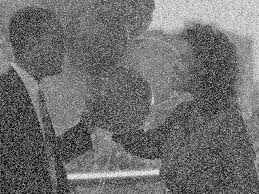

In [ ]:
### Convert to Grayscale ###

# Load grayscale image
gray_img = cv2.imread("noisy_image_sample.jpg", cv2.IMREAD_GRAYSCALE)

# Show results

from google.colab.patches import cv2_imshow

cv2_imshow(gray_img)

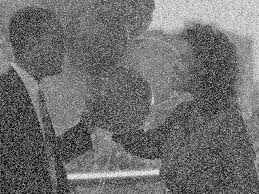

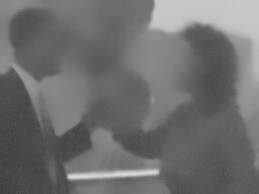

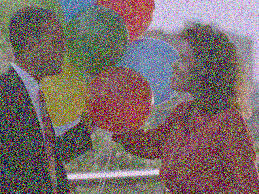

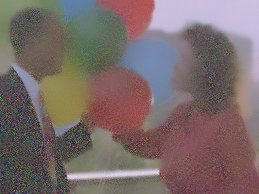

In [ ]:
### Non-Local Means Denoising ###

# Load color image
img = cv2.imread("noisy_image_sample.jpg")

# Apply Non-Local Means Denoising
denoisedG = cv2.fastNlMeansDenoising(gray_img, None, 30, 7, 21)
denoisedC = cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

# Show results
cv2_imshow(gray_img) # original Grayscale
cv2_imshow(denoisedG) # Denoised Grayscale
cv2_imshow(img) # original Color
cv2_imshow(denoisedC) # Denoised Color

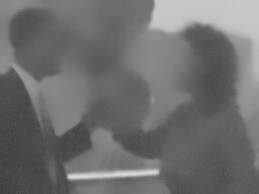

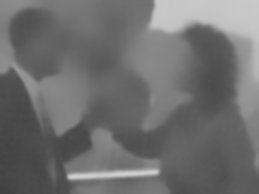

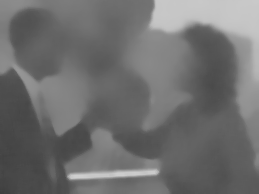

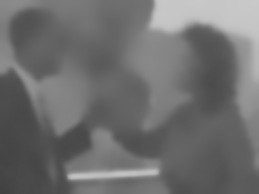

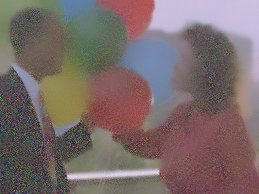

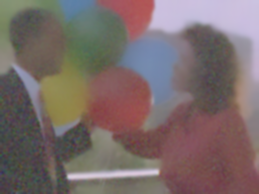

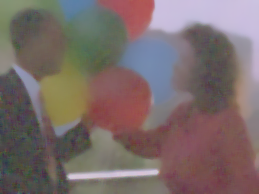

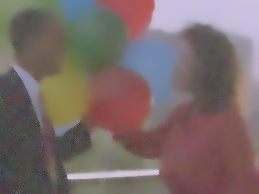

In [ ]:
### Applying Noise Reduction ###

## Grayscale ##

# Apply Median Filtering
gray_median = cv2.medianBlur(denoisedG, 5)

# Apply Gaussian Blur
gray_gaussian = cv2.GaussianBlur(denoisedG, (5,5), 0)

# Apply Bilateral Filtering
gray_bilateral = cv2.bilateralFilter(denoisedG, 9, 75, 75)

## Color ##

# Apply Median Filtering
median = cv2.medianBlur(denoisedC, 5)

# Apply Gaussian Blur
gaussian = cv2.GaussianBlur(denoisedC, (5,5), 0)

# Apply Bilateral Filtering
bilateral = cv2.bilateralFilter(denoisedC, 9, 75, 75)

# Show results

cv2_imshow(denoisedG)
cv2_imshow(gray_gaussian)
cv2_imshow(gray_median)
cv2_imshow(gray_bilateral)

cv2_imshow(denoisedC)
cv2_imshow(gaussian)
cv2_imshow(median)
cv2_imshow(bilateral)

In [ ]:
cv2.imwrite("manipulated_image.jpg", median)

from google.colab import files

files.download("manipulated_image.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>